In [125]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, explained_variance_score
%matplotlib inline
from scipy.stats import pearsonr
import seaborn as sns
import statsmodels.formula.api as sm

### Problem 1 Salary prediction using “Years of Experience” as a variable.

In [88]:
data = pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [89]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


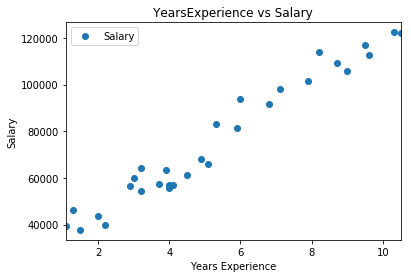

In [90]:
data.plot(x='YearsExperience', y='Salary', style='o')  
plt.title('YearsExperience vs Salary')  
plt.xlabel('Years Experience')  
plt.ylabel('Salary')  
plt.show()

In [91]:
X = data['YearsExperience'].values.reshape(-1,1)
y = data['Salary'].values.reshape(-1,1)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [93]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

##### Slope of linear regression line

In [94]:
print("Slope of the linear regression is ", regressor.coef_[0][0])

Slope of the linear regression is  9312.575126729187


##### Slope of y-intercept of the linear regression

In [95]:
print("y-intercept of the linear regression ",regressor.intercept_[0])

y-intercept of the linear regression  26780.099150628186


#### Correlation positive or negative?

In [96]:
r,p = pearsonr(X, y)
print("Pearson’s correlation coefficient ",r)
print("two-tailed p-value ", p)
print("Correlation coefficient is 0.97, thus Positive")

Pearson’s correlation coefficient  [0.97824162]
two-tailed p-value  [1.14306811e-20]
Correlation coefficient is 0.97, thus Positive


#### Slope and intercept to calculate the predicted salary for an employee with a 6.5 years of experience.

In [97]:
predictedSalary = (regressor.coef_[0][0]*6.5) + regressor.intercept_[0] # y = mx+c
predictedSalary

87311.8374743679

##### Use the slope and intercept to calculate predicted salary for an employee with a 2.7 years of experience.

In [98]:
predictedSalary = (regressor.coef_[0][0]*2.7) + regressor.intercept_[0] # y = mx+c
predictedSalary

51924.051992796994

#### Determine the correlation coefficient r

In [99]:
r,p = pearsonr(X, y)
print("Pearson’s correlation coefficient ",r)

Pearson’s correlation coefficient  [0.97824162]


#### Is the correlation none, weak, moderate, strong, or perfect?

In [100]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [101]:
print("Correlation is very strong")

Correlation is very strong


#### Prediction 

In [102]:
y_pred = regressor.predict(X_test)
y_pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [103]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': [int(x) for x in y_pred.flatten()]})
df

,Actual,Predicted
0,37731,40748
1,122391,122699
2,57081,64961
3,63218,63099
4,116969,115249
5,109431,107799


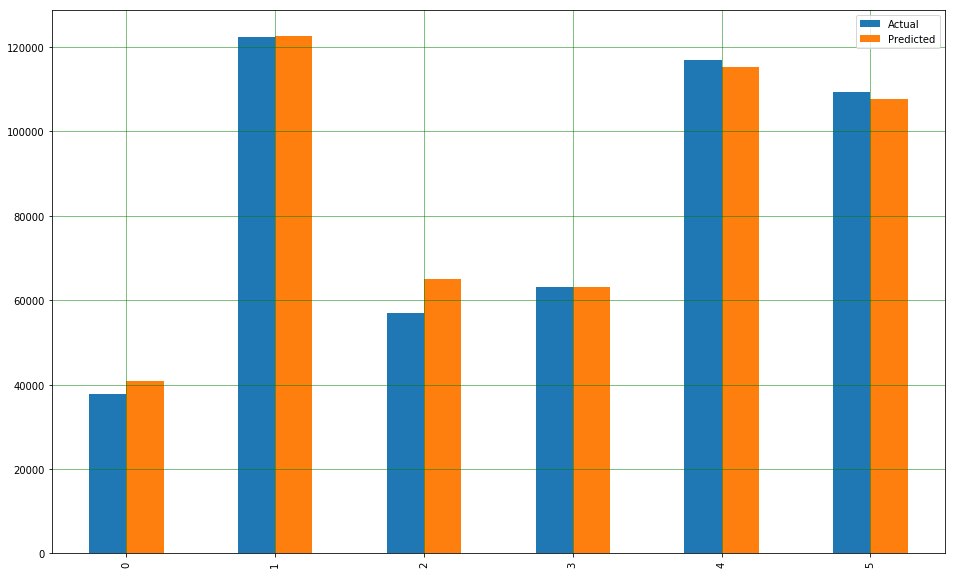

In [104]:
df1 = df
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

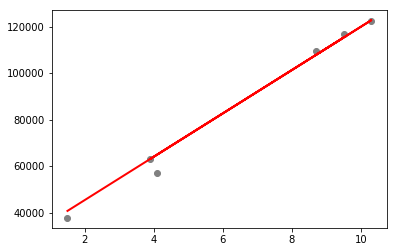

In [105]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [106]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2446.1723690465064
Mean Squared Error: 12823412.298126562
Root Mean Squared Error: 3580.979237321345


#### Does the relationship appear to be linear or non-linear?

In [107]:
print("The Linear appears to be linear")

The Linear appears to be linear


#### Coefficient of determination

In [108]:
r2_score(y_test, y_pred)  

0.988169515729126

####  What percent in the variation in the “salary” accounts for the variation “Years of experience”?

In [109]:
variation = explained_variance_score(y_test, y_pred)
variation

0.9897037514693541

#### Which inference would you make about the dataset?

In [110]:
"The questions answered above satisfies my inference about the dataset"

'The questions answered above satisfies my inference about the dataset'

# Wine Quality prediction

In [118]:
data = pd.read_csv('winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [119]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Find the correlations between each attribute of dataset.

Text(0.5, 1.0, 'Correlation between variables')

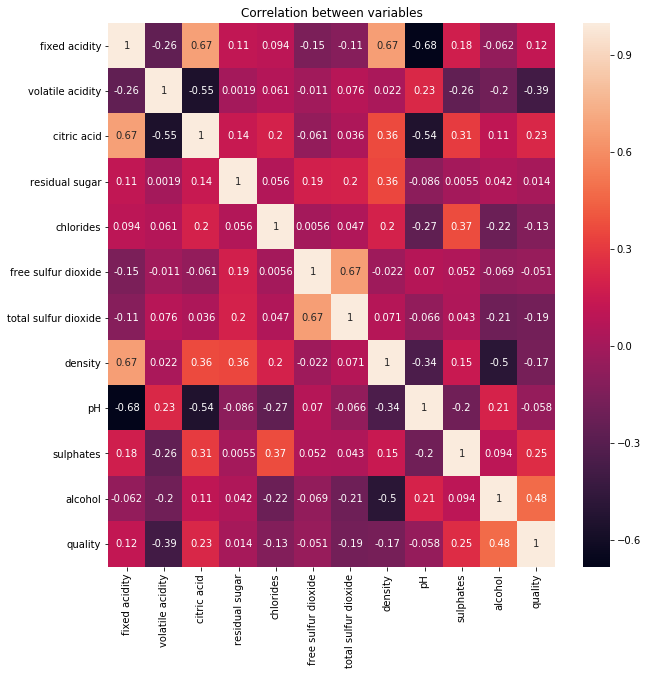

In [120]:
data_corr = data.corr()
fig, ax = plt.subplots(figsize = (10,10))
g= sns.heatmap(data_corr,ax=ax, annot= True)
ax.set_title('Correlation between variables')

In [121]:
linear_dataset = data.drop(['fixed acidity','density','citric acid','free sulfur dioxide','total sulfur dioxide'],axis = 1,inplace=False)

X = linear_dataset.loc[:,'volatile acidity' : 'alcohol'].values
y = linear_dataset.loc[:, 'quality'].values

In [126]:
X_opt = X[:,0:6]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.879e+04
Date:                Wed, 07 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:29:49   Log-Likelihood:                -1633.3
No. Observations:                1599   AIC:                             3279.
Df Residuals:                    1593   BIC:                             3311.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.0885      0.104    -10.464      0.000      -1.293      -0.884
x2             0.0123      0.012      1.034      0.301      -0.011       0.036
x3            -0.8770      0.399     -2.197      0.028      -1.660      -0.094
x4             0.6015      0.060     10.025      0.000       0.484       0.719
x5             1.0467      0.112      9.343      0.000       0.827       1.266
x6             0.3424      0.017     20.415      0.000       0.310       0.375
==============================================================================
Omnibus:                       35.637   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.760
Skew:                          -0.193   Prob(JB):                     2.87e-13
Kurtosis:                       3.848   Cond. No.                         271.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Draw a heatmap of correlations among each attributes

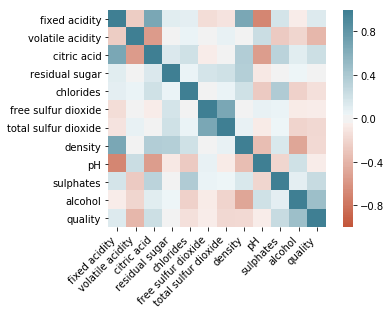

In [127]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [128]:
print("fixed acidity','density','citric acid','free sulfur dioxide','total sulfur dioxide are negative attributes")

fixed acidity','density','citric acid','free sulfur dioxide','total sulfur dioxide are negative attributes


In [ ]:
print("Volatile acidity")